<a href="https://colab.research.google.com/github/yueyanamanda/PIMA-Indians-Diabetes/blob/main/PIMA_Indians_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima Indians Diabetes Dataset

**Task Type**: Binary classification (whether or not the patient has diabetes)

**Feature Examples**: number of pregnancies, BMI, insulin, age, blood pressure, etc.

**Sample Size**：768

**Suitable Models**: Logistic Regression, KNN, Decision Tree, XGBoost

🔗 **Link to Database**：
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
import numpy as np
import re
import math
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import math
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/PIMA/diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Sample: assuming your DataFrame is named df
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

nan_counts = df[columns].isna().sum()

print(nan_counts)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)

Outcome
0    500
1    268
Name: count, dtype: int64


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

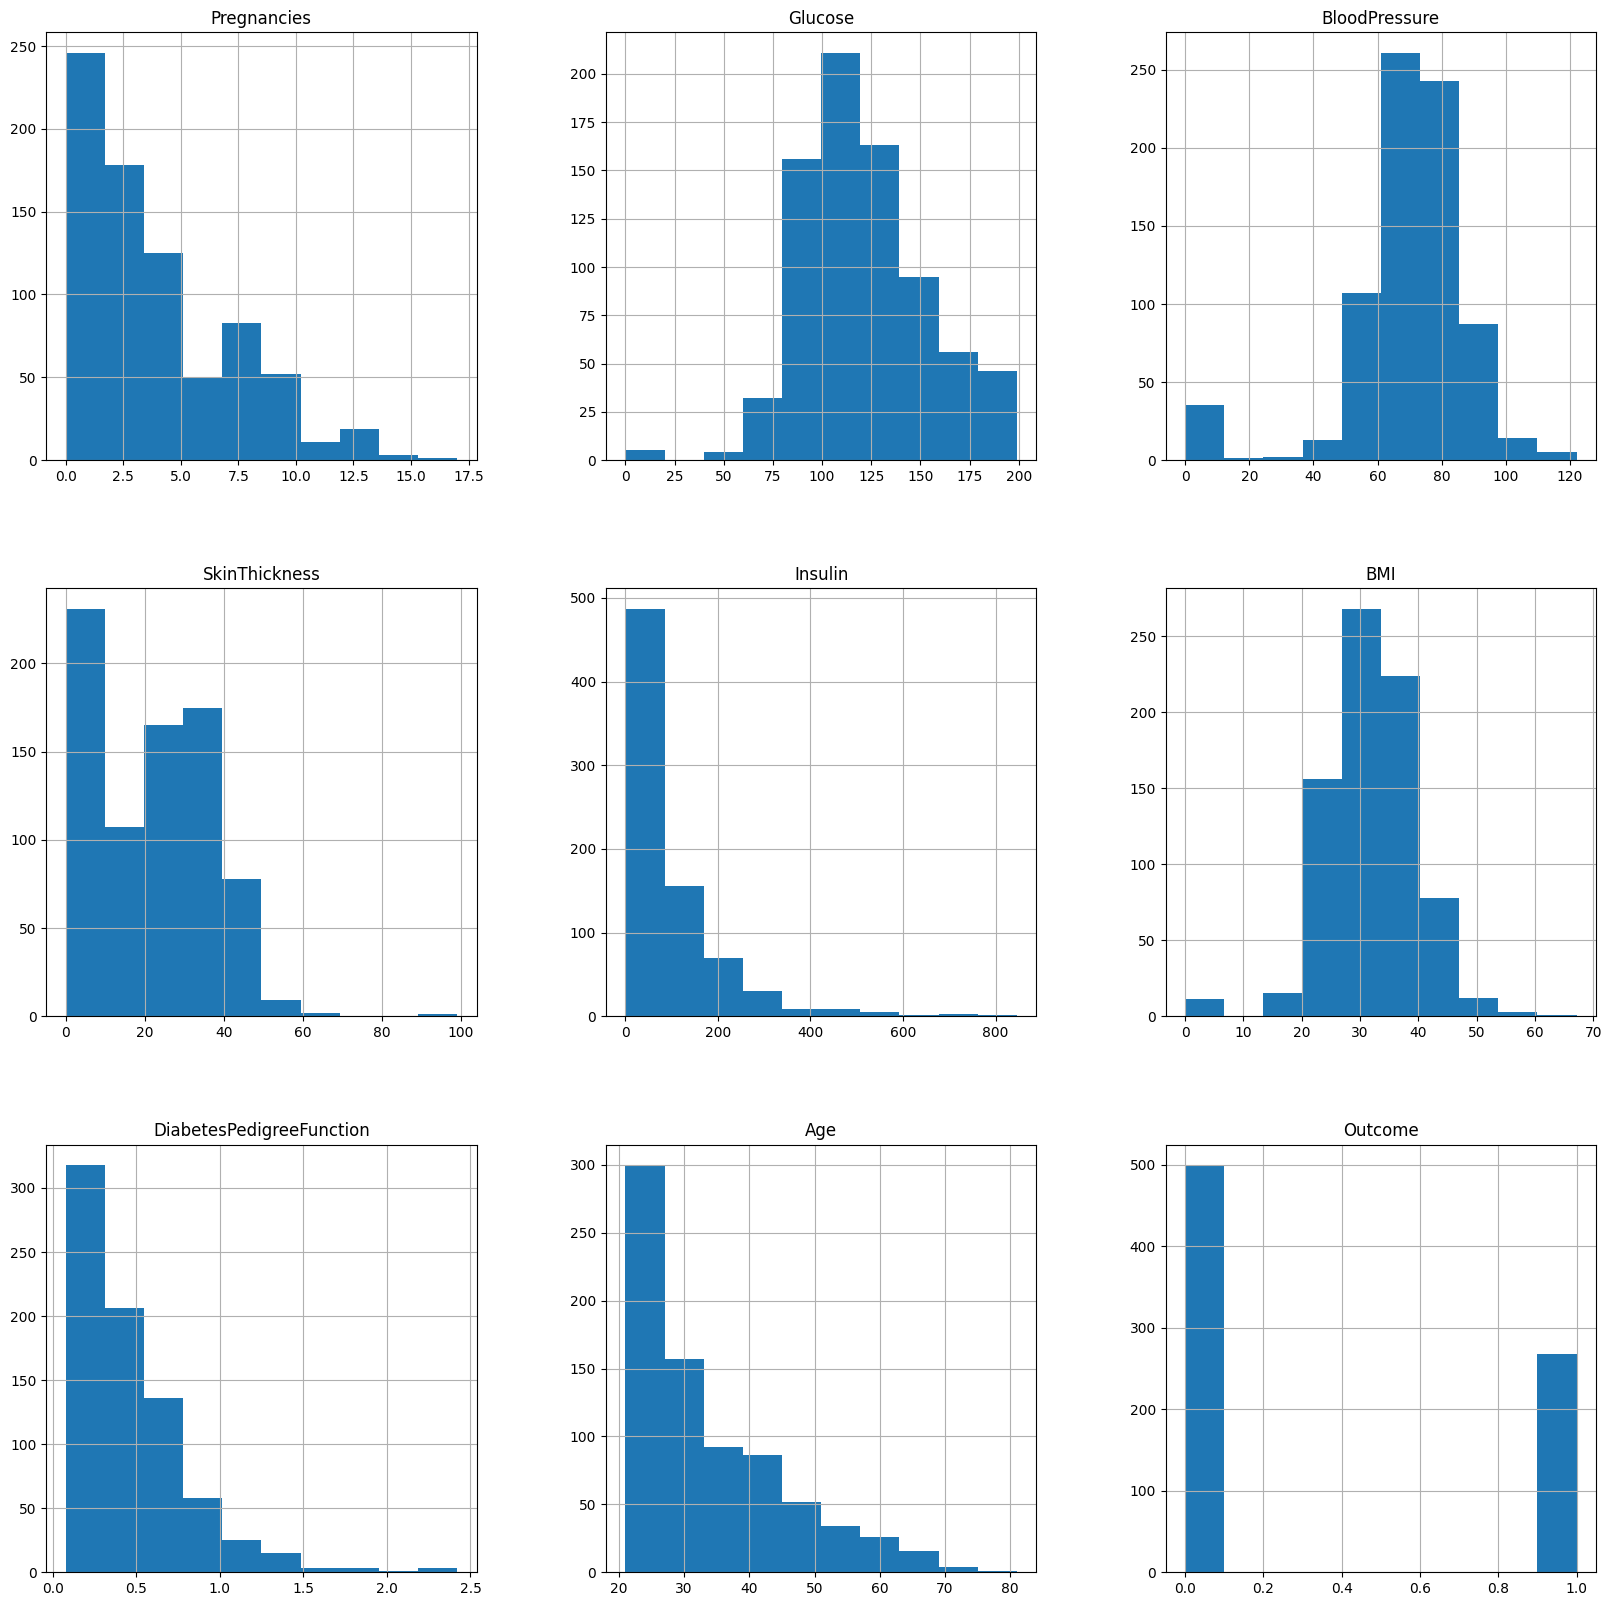

In [ ]:
df.hist(figsize = (20,20))

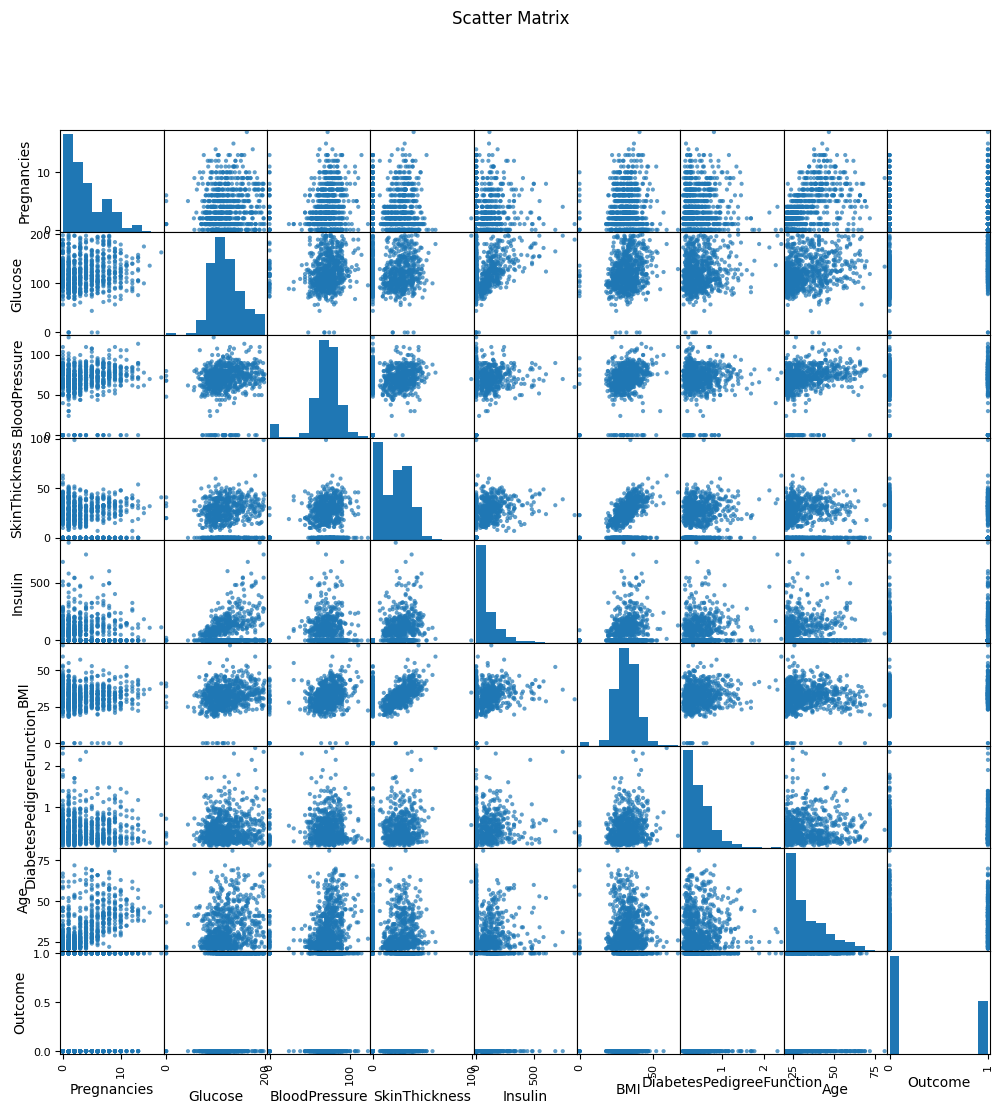

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Scatter matrix
scatter_matrix(df, figsize=(12, 12), diagonal='hist', alpha=0.7)

plt.suptitle("Scatter Matrix")
plt.show()

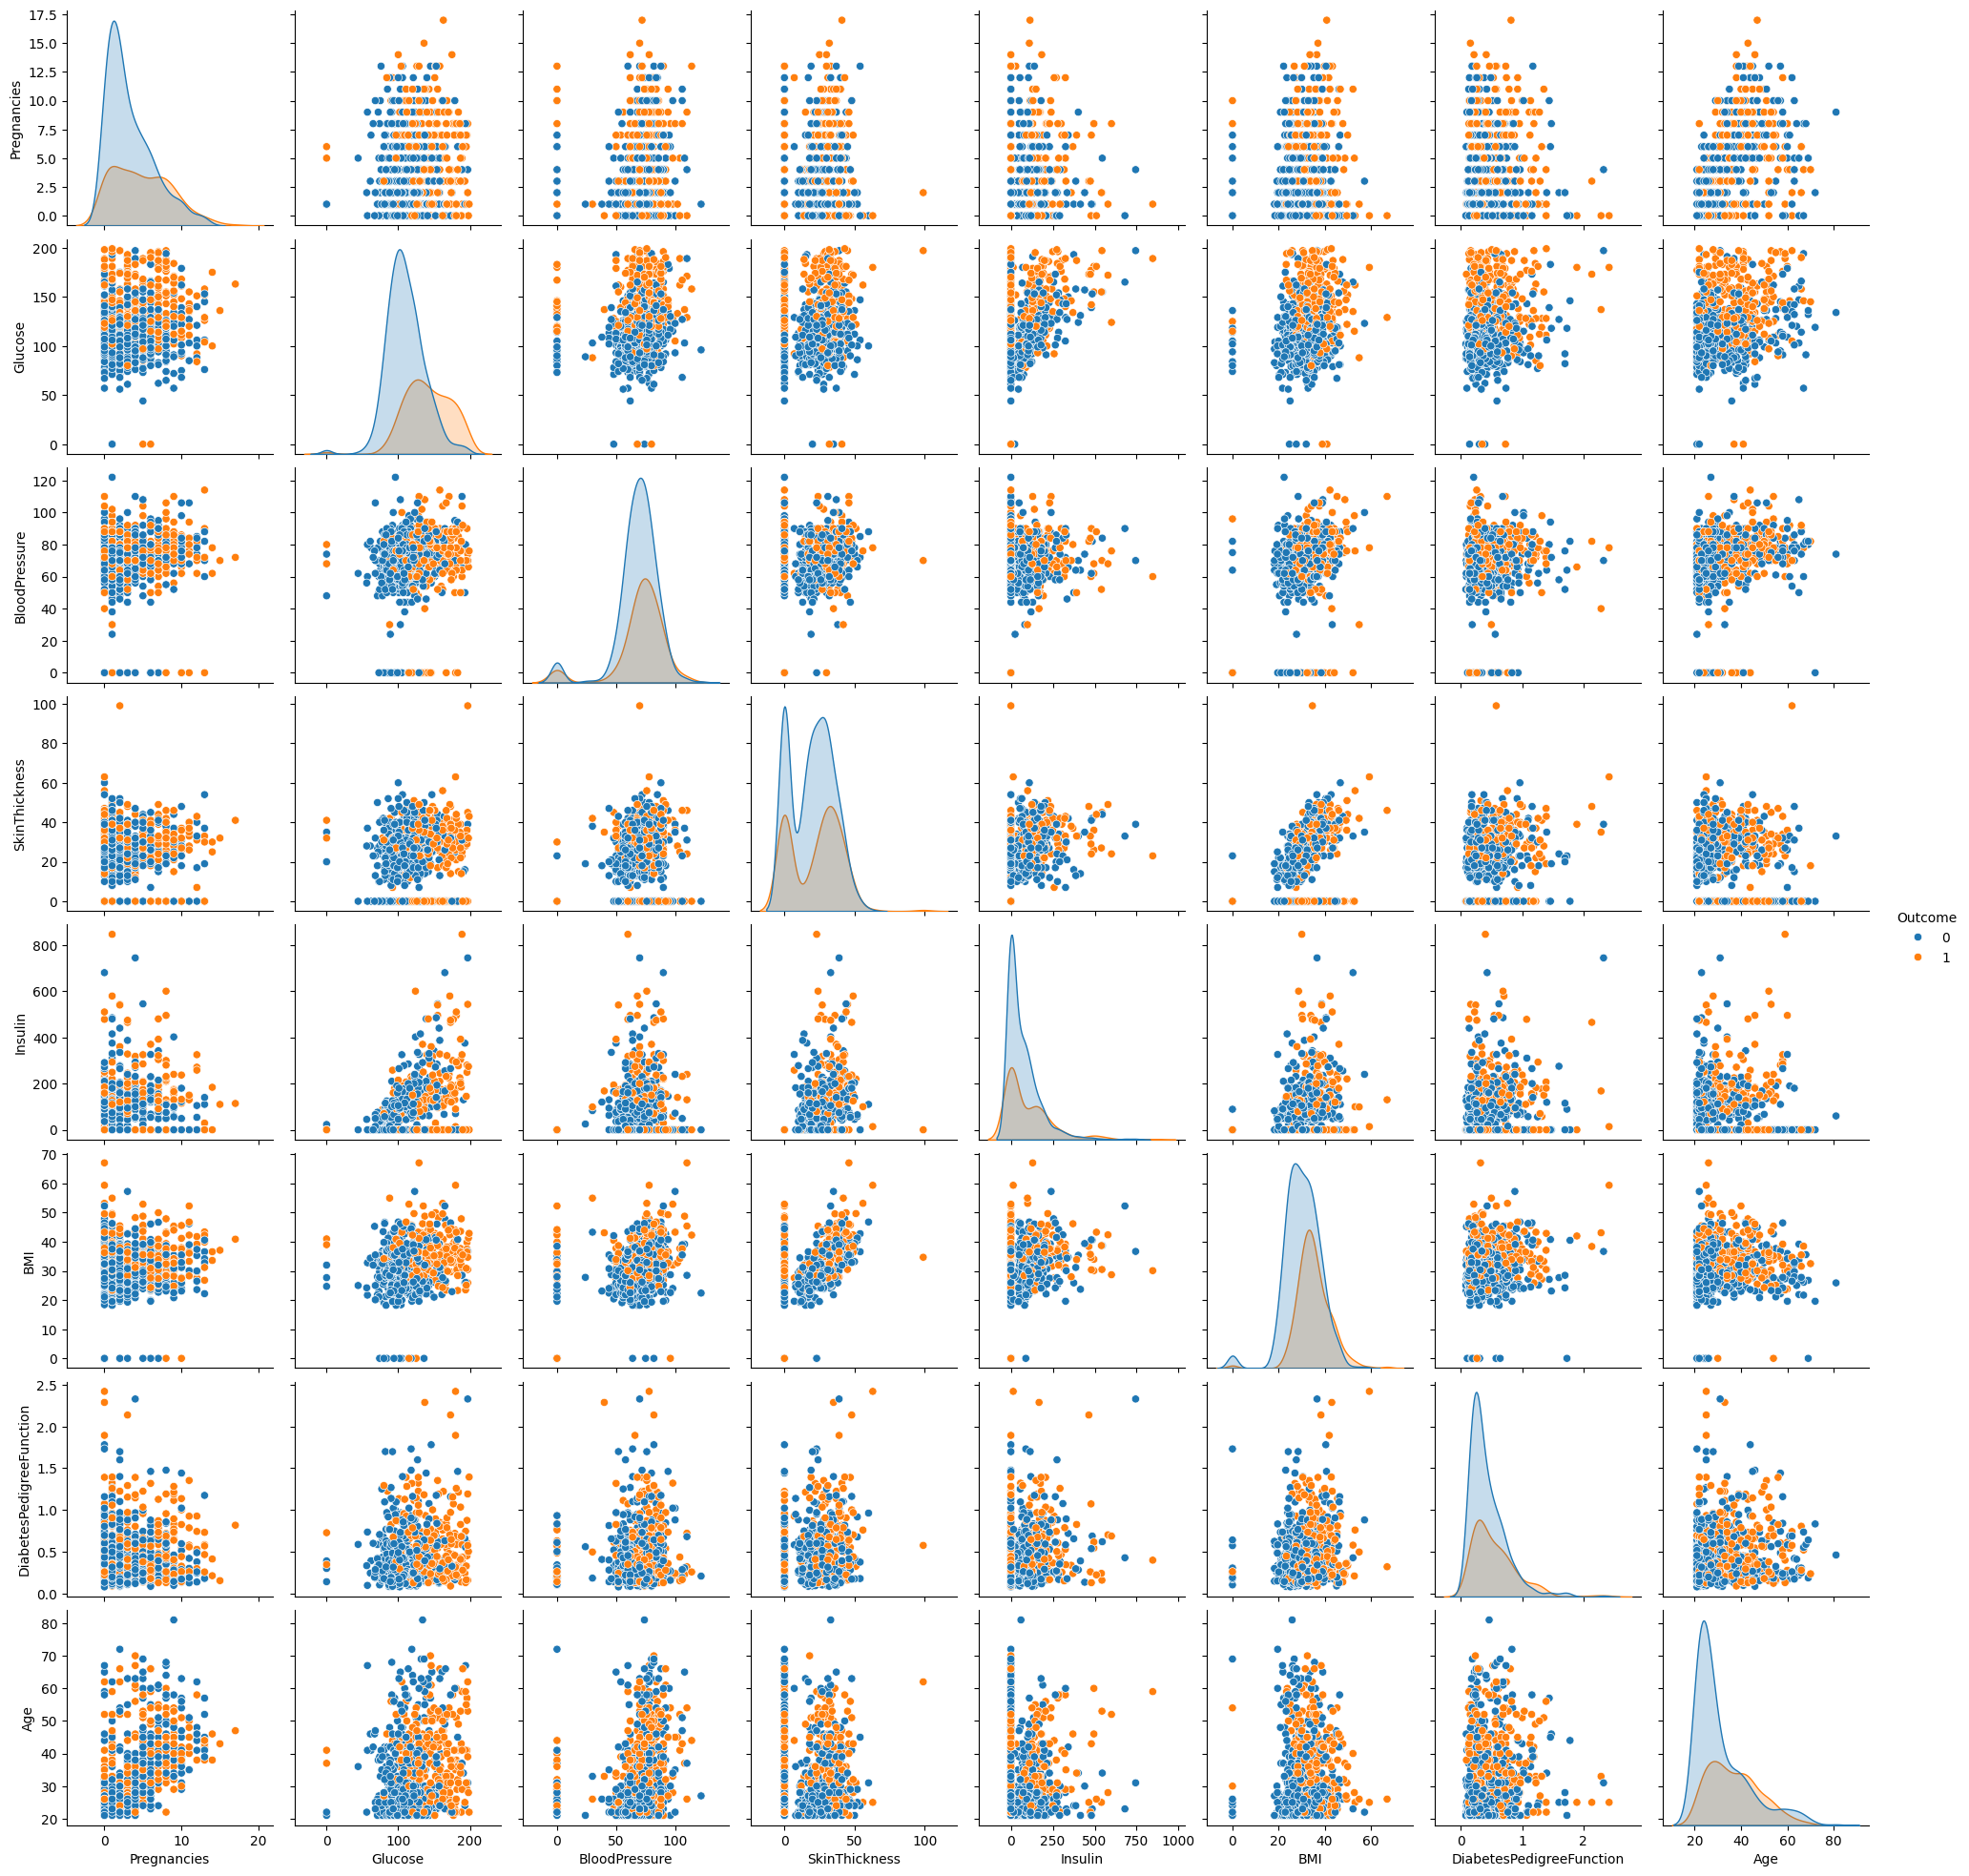

In [ ]:
sns.pairplot(df, hue = 'Outcome')

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

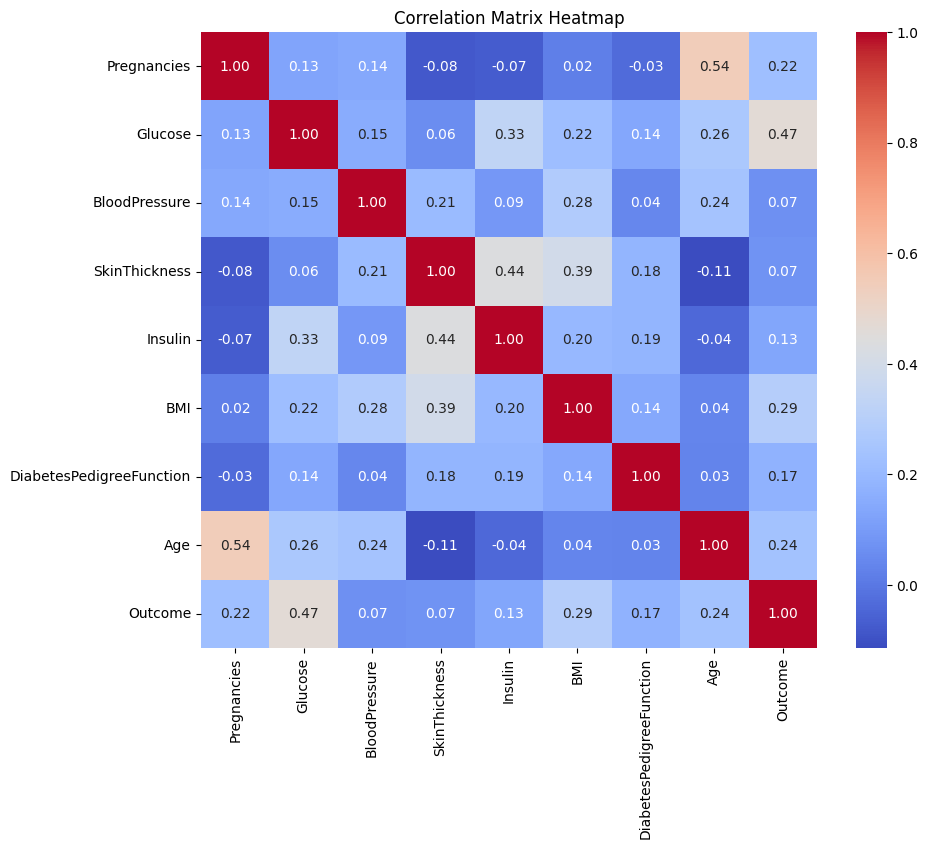

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

#✅ Summary
* Retain features that are highly correlated with the target variable (e.g., Outcome) (correlation > 0.2).
* Remove redundant features that are highly correlated with each other (>0.85) to avoid multicollinearity.

In [ ]:
from scipy.stats import mannwhitneyu
import pandas as pd

# List of features to test
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age']

# Assuming your DataFrame has a column 'group' with values 'group1' and 'group2'
group0_df = df[df['Outcome'] == 0]
group1_df = df[df['Outcome'] == 1]

# Perform Mann-Whitney U test for each feature
results = []

for feature in features:
    stat, p = mannwhitneyu(group0_df[feature], group1_df[feature], alternative='two-sided')
    results.append({
        'Feature': feature,
        'Group1 Median': group0_df[feature].median(),
        'Group2 Median': group1_df[feature].median(),
        'U Statistic': stat,
        'p-value': p
    })

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='p-value')



In [ ]:
results_df

,Feature,Group1 Median,Group2 Median,U Statistic,p-value
1,Glucose,107.000,140.000,28390.5,1.200727e-39
5,BMI,30.050,34.250,41866.0,9.730790e-18
7,Age,27.000,36.000,41950.0,1.142200e-17
0,Pregnancies,2.000,4.000,50985.0,3.745146e-08
6,DiabetesPedigreeFunction,0.336,0.449,52769.0,1.196583e-06
2,BloodPressure,70.000,74.000,55414.5,7.558512e-05
3,SkinThickness,21.000,27.000,59814.0,1.296183e-02
4,Insulin,39.000,0.000,61926.5,6.566037e-02


In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# === Assume df is your original imbalanced dataset ===
# Set features and target
feature_cols = [  'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols]
y = df['Outcome']

# Define desired number of samples per class
target_sample_count = 500
unique_classes = y.unique()

# Build the sampling strategy dictionary
sampling_strategy = {cls: target_sample_count for cls in unique_classes}

# Apply SMOTE with custom sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine into new DataFrame
df_smote = pd.DataFrame(X_resampled, columns=feature_cols)
df_smote['Outcome'] = y_resampled

# Check result
print(df_smote['Outcome'].value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


In [ ]:
df_smote.to_csv('/content/drive/MyDrive/PIMA/diabetes_smote.csv')

In [ ]:
df_smote=pd.read_csv('/content/drive/MyDrive/PIMA/diabetes_smote.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.765
              precision    recall  f1-score   support

           0       0.82      0.68      0.74        99
           1       0.73      0.85      0.79       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29468 (\N{CJK UNIFIED IDEOGRAPH-731C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


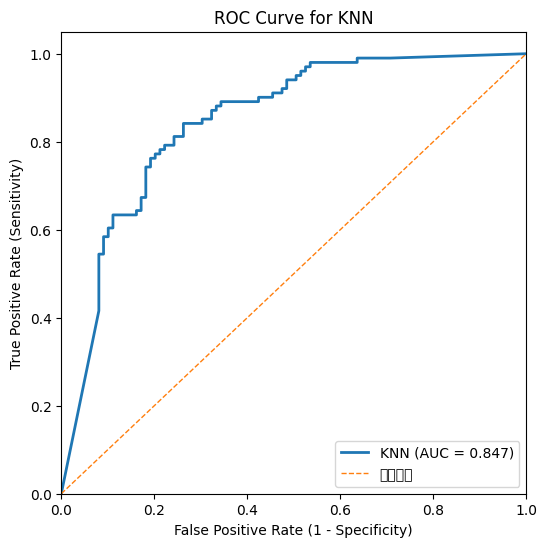

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# feature columns
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Features (X) and target (y)
X = df_smote[feature_cols]
y = df_smote['Outcome']

# Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid Search + Cross-Validation
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=3,              # 5 折交叉验证
    scoring='accuracy',
    n_jobs=-1
)

# Model fitting
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate performance on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Output the classification report and accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1) Predict the probability of the positive class (1)
y_score = best_knn.predict_proba(X_test)[:, 1]

# 2) Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 3) Visualize the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label=f'KNN (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, label='随机猜测')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.81      0.78      0.80       101

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29468 (\N{CJK UNIFIED IDEOGRAPH-731C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


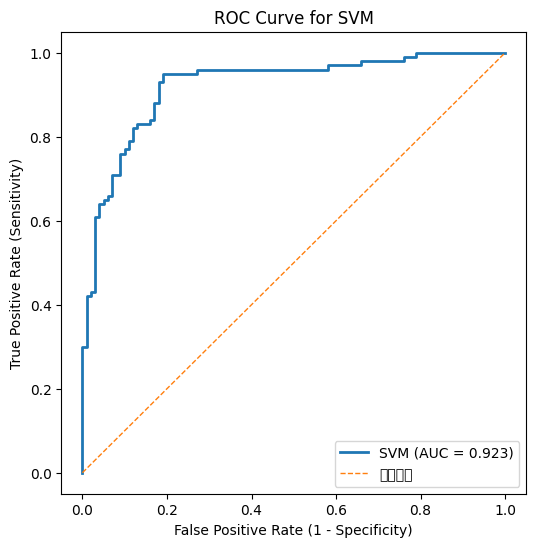

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Features (X) and target (y)
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df_smote[feature_cols]
y = df_smote['Outcome']

# Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Parameter grid: testing different kernels and hyperparameter combinations
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 0.01, 0.1, 1]
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1],
        'degree': [2, 3],
        'gamma': ['scale']
    },
    {
        'kernel': ['sigmoid'],
        'C': [0.1, 1, 10],
        'gamma': ['scale']
    }
]

# Perform hyperparameter search using GridSearchCV
grid_search = GridSearchCV(
    SVC(),
    param_grid,
    cv=3,  # 三折交叉验证
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on the test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1) Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 2) Enable probability in SVM
svm_model = SVC(kernel='rbf', C=10, gamma=0.01, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# 3) Obtain predicted probabilities (for the positive class)
y_score = svm_model.predict_proba(X_test)[:, 1]

# 4) Compute the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 5) Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label=f'SVM (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], lw=1, linestyle='--', label='随机猜测')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()




Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'colsample_bytree': np.float64(0.8270204442119109), 'gamma': 0, 'learning_rate': np.float64(0.04974313630683449), 'max_depth': 5, 'n_estimators': 180, 'reg_alpha': np.float64(0.71134195274865), 'reg_lambda': np.float64(2.5803510810624113), 'subsample': np.float64(0.8817879924343034)}
Best Accuracy: 0.8160000000000001
    colsample_bytree  gamma  learning_rate  max_depth  n_estimators  \
9           0.827020    0.0       0.049743        5.0         180.0   
43          0.806792    0.0       0.034033        7.0         168.0   
62          0.940633    0.0       0.203976        7.0         146.0   
0           0.812362    0.0       0.046687        7.0         120.0   
81          0.906335    1.0       0.041396        7.0         180.0   
42          0.754860    0.0       0.065987        7.0         168.0   
65          0.732027    0.0       0.065476        6.0         189.0   
77          0.847785    0.0     

/tmp/ipython-input-365055917.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


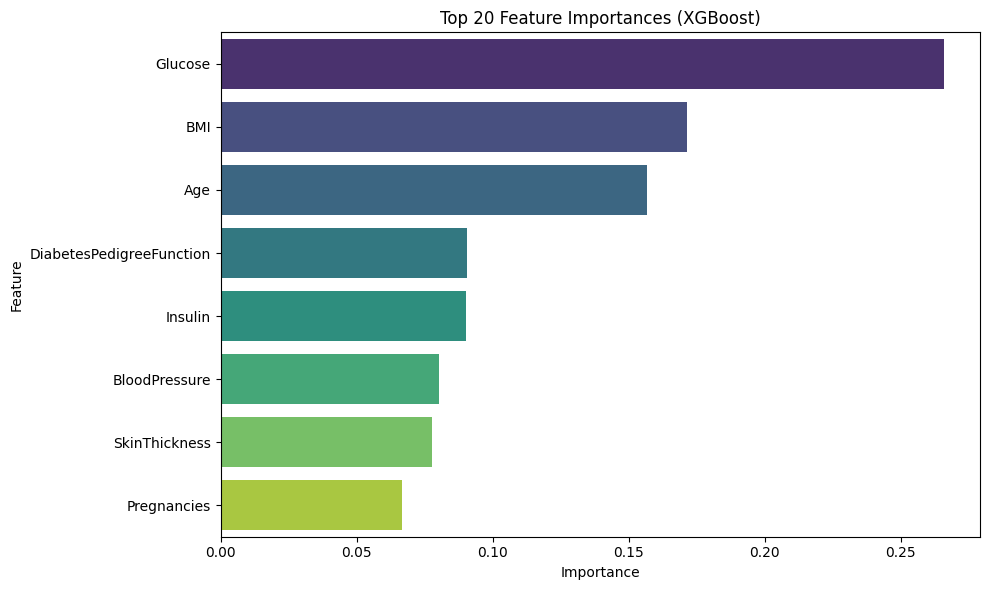

/tmp/ipython-input-365055917.py:124: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-365055917.py:124: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-365055917.py:124: UserWarning: Glyph 29468 (\N{CJK UNIFIED IDEOGRAPH-731C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-365055917.py:124: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

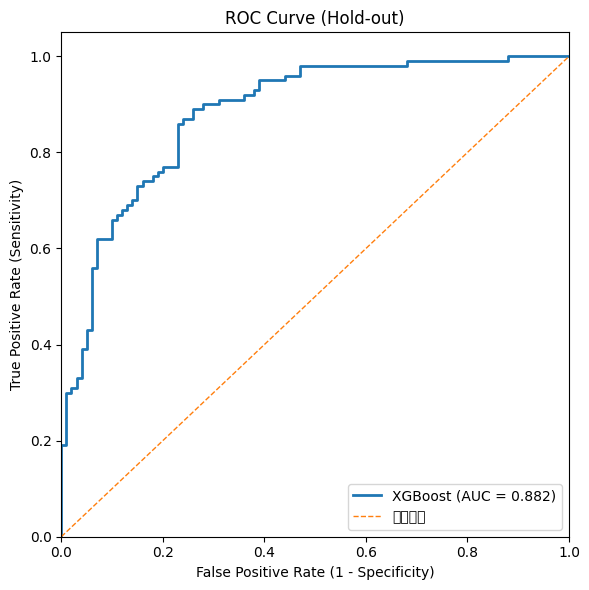

In [ ]:
# Features and tags
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df_smote[feature_cols]
y = df_smote['Outcome']

# Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Base model
xgb_model = XGBClassifier(
    objective='binary:logistic',   # for binary classification
    eval_metric='logloss',         # logloss works for binary
    random_state=42
)
# Define random search space
param_distributions = {
    'max_depth': randint(3, 8),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 250),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': [0, 1, 5],
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(1, 2)
}

# Randomized Search (only try 100 random combinations)
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Run search
random_search.fit(X, y_encoded)

# Results
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)
# === Save all parameter tuning results ===
cv_results = pd.DataFrame(random_search.cv_results_)

# Select only useful columns (params + mean test score)
results_df = cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].copy()

# Expand params dict into separate columns
params_df = results_df['params'].apply(pd.Series)

# Combine params with scores
final_results_df = pd.concat([params_df, results_df.drop(columns=['params'])], axis=1)

# Sort by accuracy (mean_test_score)
final_results_df = final_results_df.sort_values(by='mean_test_score', ascending=False)

# Display top 10 results
print(final_results_df.head(10))


import matplotlib.pyplot as plt
import seaborn as sns

# Refit best estimator to entire data (optional but recommended)
best_model = random_search.best_estimator_
best_model.fit(X, y_encoded)

# Get feature importances
importances = best_model.feature_importances_

# Create DataFrame for ranking
feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display ranked features
print(feature_importance_df)


# Optional: Plot top 20 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 1) Split the dataset into training/testing sets (stratify to preserve class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 2) Retrain the best model on the training set
best_model.fit(X_train, y_train)

# 3) Predict the probability of the positive class (1)
y_score = best_model.predict_proba(X_test)[:, 1]

# 4) Compute the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)  # 或 roc_auc_score(y_test, y_score)

# 5) Plot the curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label=f'XGBoost (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], lw=1, linestyle='--', label='随机猜测')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve (Hold-out)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 375}
Best Accuracy: 0.8260000000000002
    bootstrap class_weight  max_depth max_features  min_samples_leaf  \
45       True     balanced       12.0          0.5                 1   
63      False         None       24.0         sqrt                 5   
47       True     balanced       16.0         sqrt                 1   
39      False         None       12.0          0.7                 1   
4       False         None       12.0         sqrt                 1   
95      False         None       24.0          0.7                 1   
84      False         None       12.0          0.5                 5   
83      False         None       12.0          0.5                 5   
81      False         None        8.0          0.5                 1   
14      Fals

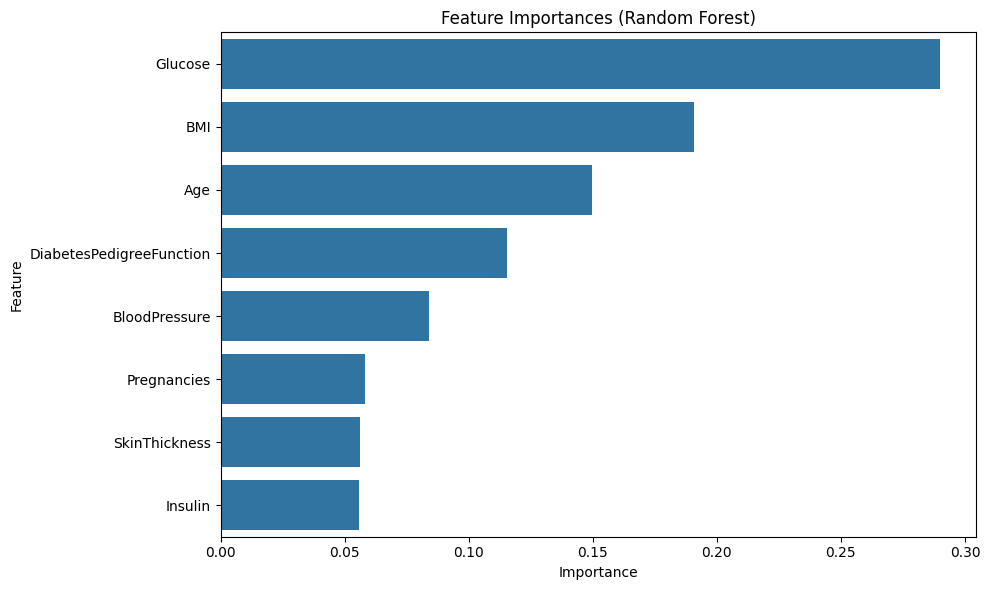

/tmp/ipython-input-3895012631.py:136: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3895012631.py:136: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3895012631.py:136: UserWarning: Glyph 29468 (\N{CJK UNIFIED IDEOGRAPH-731C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3895012631.py:136: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(

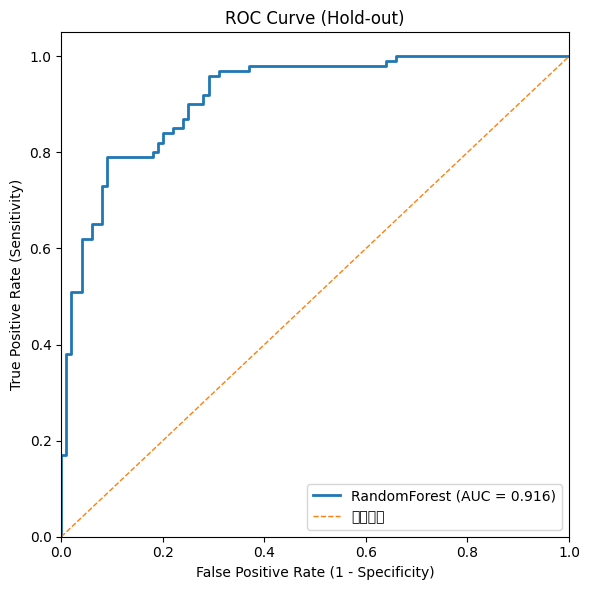

In [ ]:
# Import
import pandas as pd
import numpy as np
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Predictor variables and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df_smote[feature_cols]
y = df_smote['Outcome']

# Label encoding (can be skipped if y is already 0/1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Baseline Model (Random Forest)
rf_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

# Random search space (better aligned with Random Forest hyperparameters)
param_distributions = {
    # Number of trees: more is stabler but slower to train
    'n_estimators': randint(200, 600),
    # Maximum tree depth: None means no limit
    'max_depth': [None, 5, 8, 12, 16, 20, 24],
    # Minimum samples required to split an internal node
    'min_samples_split': randint(2, 20),
    # Minimum samples required at a leaf node
    'min_samples_leaf': randint(1, 10),
    # Number of features considered at each split
    'max_features': ['sqrt', 'log2', 0.5, 0.7, None],
    # Whether to use bootstrap sampling
    'bootstrap': [True, False],
    # Class weights (try 'balanced' for class imbalance)
    'class_weight': [None, 'balanced']
}

# Randomized search (example: 100 iterations)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='accuracy',   # If the data is imbalanced, it is recommended to use 'roc_auc' or 'f1' instead.
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Run the research
random_search.fit(X, y_encoded)

# Search Results
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Save all search results
cv_results = pd.DataFrame(random_search.cv_results_)

# Select only commonly used columns (parameters + mean scores, etc.)
results_df = cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].copy()

# Expand the params dictionary into multiple columns
params_df = results_df['params'].apply(pd.Series)

# Combine parameters and scores
final_results_df = pd.concat([params_df, results_df.drop(columns=['params'])], axis=1)

# Sort by accuracy
final_results_df = final_results_df.sort_values(by='mean_test_score', ascending=False)

# Display the top 10 records
print(final_results_df.head(10))

# Apply the best model and visualize feature importances
best_model = random_search.best_estimator_
best_model.fit(X, y_encoded)

# Importance of features
importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Visualization (display all features when they are few in number)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()



from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 1) Split the dataset into training/testing sets (stratify to preserve class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 2) Retrain the best model on the training set
best_model.fit(X_train, y_train)

# 3) Predict the probability of the positive class (1)
y_score = best_model.predict_proba(X_test)[:, 1]

# 4) Compute the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)  # 或 roc_auc_score(y_test, y_score)

# 5) Plotting
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label=f'RandomForest (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], lw=1, linestyle='--', label='随机猜测')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve (Hold-out)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



In [ ]:
# Import
import pandas as pd
import numpy as np
from scipy.stats import randint, uniform
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Features (X) and target (y)
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df_smote[feature_cols]
y = df_smote['Outcome']

# Label encoding (can be skipped if y is already 0/1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# LightGBM
lgbm_model = LGBMClassifier(
    objective='binary',
    random_state=42,
    n_jobs=-1
)

# Random search space (better aligned with LightGBM hyperparameters)
param_distributions = {
    # Number of trees (consider together with learning_rate)
    'n_estimators': randint(300, 1200),
    # Learning rate
    'learning_rate': uniform(0.01, 0.19),  # 0.01 ~ 0.20
    # Number of leaves (larger values may lead to overfitting)
    'num_leaves': randint(15, 80),
    # Maximum depth (-1 means no limit)
    'max_depth': [-1, 4, 6, 8, 10, 12],
    # Row sampling and column sampling
    'subsample': uniform(0.6, 0.4),        # 0.6 ~ 1.0
    'colsample_bytree': uniform(0.6, 0.4), # 0.6 ~ 1.0
    # Minimum samples in a leaf (important for avoiding overfitting)
    'min_child_samples': randint(5, 50),
    # L1 / L2 regularization
    'reg_alpha': uniform(0.0, 1.0),
    'reg_lambda': uniform(0.0, 2.0),
    # Minimum split gain (threshold for a split to occur)
    'min_split_gain': uniform(0.0, 1.0),
    # Subsampling frequency (used together with subsample)
    'subsample_freq': randint(0, 10),
    # Boosting type
    'boosting_type': ['gbdt', 'dart'],
    # Class weight strategy (useful when classes are imbalanced)
    'class_weight': [None, 'balanced']
}

# Random Search (100 as example)
# If the classes are imbalanced, it is recommended to use scoring='roc_auc' or scoring='f1'.
random_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='accuracy',   # For imbalanced data, switch to 'roc_auc' or 'f1'.
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# ========= 6) 运行搜索 =========
random_search.fit(X, y_encoded)

# ========= 7) 搜索结果 =========
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Run search
cv_results = pd.DataFrame(random_search.cv_results_)

# Select only the commonly used columns (parameters + mean scores, etc.)
results_df = cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].copy()

# Expand the params dictionary into multiple columns
params_df = results_df['params'].apply(pd.Series)

# Combine parameters and scores
final_results_df = pd.concat([params_df, results_df.drop(columns=['params'])], axis=1)

# Sort by score
final_results_df = final_results_df.sort_values(by='mean_test_score', ascending=False)

# Display the top 10 records
print(final_results_df.head(10))

# Use the best model and visualize feature importance
best_model = random_search.best_estimator_
best_model.fit(X, y_encoded)

# Get feature importance (gain is more interpretable, but 'split' can also be used)
importances = best_model.booster_.feature_importance(importance_type='gain')
feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Get feature importance (gain is more interpretable, but 'split' can also be used)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importances (LightGBM, gain)')
plt.tight_layout()
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 1) Split the dataset into training and testing sets (stratify to preserve class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 2) Retrain the best model on the training set
best_model.fit(X_train, y_train)

# 3) Predict the probability of the positive class (1)
y_score = best_model.predict_proba(X_test)[:, 1]

# 4) Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)  # 或 roc_auc_score(y_test, y_score)

# 5) Plotting
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, lw=2, label=f'lightGBM (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], lw=1, linestyle='--', label='随机猜测')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve (Hold-out)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()